In [7]:
from numpy.random import normal
import pandas as pd
import matplotlib
from matplotlib import pyplot as plt

In [8]:
matplotlib.rcParams["font.size"] = 16

In [15]:
# create dummy data
df = pd.DataFrame({
    # avg, std dev, how many
    "X": normal(10, 20, 100),
    "Y": normal(15, 20, 100),
}, index=range(0, 100)).cumsum()

df

,X,Y
0,-7.827757,-6.821985
1,-1.829725,-0.664271
2,24.961681,34.410254
3,38.560976,66.211229
4,8.992480,61.046662
...,...,...
95,1013.791453,1399.888157
96,1033.847180,1392.281307
97,1061.584702,1428.289156
98,1058.621622,1450.789076


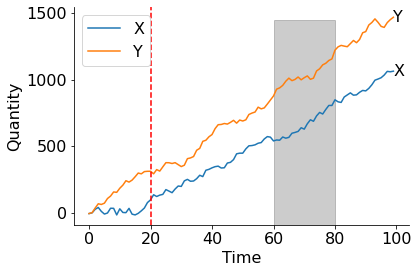

In [64]:
ax = df.plot.line()

ax.set_xlabel("Time")
ax.set_ylabel("Quantity")
ax.spines["right"].set_visible(False)
ax.spines["top"].set_visible(False)

# 1. text on lines (instead of legend)
ax.text(df.index[-1], df.iloc[-1, 0], df.columns[0], va="center", ha="left")
ax.text(df.index[-1], df.iloc[-1, -1], df.columns[1], va="center", ha="left")

# 2. vertical line (perhaps marking some event)
patch = plt.Line2D([20, 20], ax.get_ylim(), color="r", linestyle="--")
ax.add_artist(patch)

# 3. rectangle (mark some time interval)
patch = plt.Rectangle([60, ax.get_ylim()[0]], 20, ax.get_ylim()[1], color="k", zorder=-1, alpha=0.2,
                     transform=ax.transData)
ax.add_artist(patch)

# patch = plt.Rectangle([0, 0], 0.5, 1, color="b", zorder=-1, alpha=0.2,
#                      transform=ax.transAxes)
# ax.add_artist(patch)

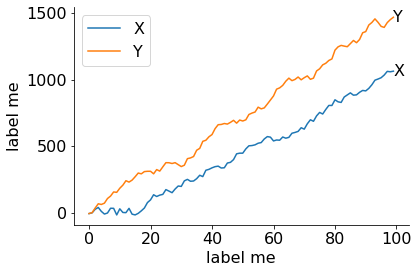

In [73]:
def labeled_lines(df, xlabel="label me", ylabel="label me"):
    ax = df.plot.line(legend=[xlabel, ylabel])
    ax.set_xlabel(xlabel)
    ax.set_ylabel(ylabel)

    ax.spines["right"].set_visible(False)
    ax.spines["top"].set_visible(False)
    
    last_x = df.index[-1]
    for i in range(len(df.columns)):
        last_y = df.iloc[-1, i]
        line_name = df.columns[i]
        ax.text(last_x, last_y, line_name, va="center", ha="left")
    return ax

labeled_lines(df)